# Explore ADCP Transdrift

In [1]:
# Read .txt each year
# Clean
#      remove when not enough data (less than 1/2 ?)
# ... 
# Convert to SIT (draft*1.1xx)
# Daily average as netcdf

## Read .txt yearly file

In [2]:
import scipy.io
import h5py
from glob import glob
import numpy as np
import xarray as xr
import datetime
import re
import matplotlib.pyplot as plt

from src.utils import save_name

In [9]:
name_buoy = 'Anabar'
# 'Khatanga'
# 'Lena'
# 'OuterShelf'

# globglob the file
idir = f'/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/'
ifile = glob(f'{idir}*{name_buoy}*.tab')[0]

In [10]:
ifile

'/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/Anabar-09_sea-ice-draft.tab'

In [406]:
# need to identify if 5 or 10 min ? for later

In [11]:
with open(f'{ifile}','r') as f:
    lines = f.readlines()

header_var = ['Date/Time\tLatitude\tLongitude\tSea ice draft [m]\n']

# data start at this line
idx_start = np.where(np.array([s in header_var for s in lines]))[0][0]+1

In [35]:
header = lines[:idx_start]

In [36]:
header

['/* DATA DESCRIPTION:\n',
 'Citation:\tBelter, Hans Jakob; Janout, Markus A; Hölemann, Jens A; Krumpen, Thomas (2020): Daily mean sea ice draft from moored upward-looking Acoustic Doppler Current Profiler (ADCP) at site Anabar-0910 in the Laptev Sea. PANGAEA, https://doi.org/10.1594/PANGAEA.912908, \n',
 '\tIn: Belter, HJ et al. (2020): Daily mean sea ice draft from moored upward-looking Acoustic Doppler Current Profilers (ADCPs) in the Laptev Sea from 2003 to 2016. PANGAEA, https://doi.org/10.1594/PANGAEA.912927\n',
 'Keyword(s):\tADCP; Laptev Sea; sea ice draft\n',
 'Related to:\tBelter, Hans Jakob; Krumpen, Thomas; Hendricks, Stefan; Hölemann, Jens A; Janout, Markus A; Ricker, Robert; Haas, Christian (2020): Satellite-based sea ice thickness changes in the Laptev Sea from 2002 to 2017: comparison to mooring observations. The Cryosphere, 14(7), 2189-2203, https://doi.org/10.5194/tc-14-2189-2020\n',
 '\tBelter, Hans Jakob; Krumpen, Thomas; Janout, Markus A; Ross, E; Haas, Christian (

In [48]:
header_var = ['date', 'lat', 'lon','draft']

In [37]:
data_str = lines[idx_start:]

In [38]:
data_str

['2009-09-18\t74.3300\t128.0100\t0.2448386\n',
 '2009-09-19\t74.3300\t128.0100\t0.1933409\n',
 '2009-09-21\t74.3300\t128.0100\t0.2286825\n',
 '2009-10-02\t74.3300\t128.0100\t0.2583648\n',
 '2009-10-08\t74.3300\t128.0100\t0.2678643\n',
 '2009-10-09\t74.3300\t128.0100\t0.1898610\n',
 '2009-10-13\t74.3300\t128.0100\t0.2565207\n',
 '2009-10-24\t74.3300\t128.0100\t0.2320332\n',
 '2009-10-25\t74.3300\t128.0100\t0.3069651\n',
 '2009-10-26\t74.3300\t128.0100\t0.3088551\n',
 '2009-10-27\t74.3300\t128.0100\t0.2833305\n',
 '2009-11-01\t74.3300\t128.0100\t0.1954376\n',
 '2009-11-02\t74.3300\t128.0100\t0.2682050\n',
 '2009-11-03\t74.3300\t128.0100\t0.3553128\n',
 '2009-11-16\t74.3300\t128.0100\t0.7167440\n',
 '2009-11-17\t74.3300\t128.0100\t0.8008263\n',
 '2009-11-18\t74.3300\t128.0100\t1.6717710\n',
 '2009-11-19\t74.3300\t128.0100\t1.2815680\n',
 '2009-11-20\t74.3300\t128.0100\t2.2217730\n',
 '2009-11-21\t74.3300\t128.0100\t1.0810450\n',
 '2009-11-22\t74.3300\t128.0100\t2.5923110\n',
 '2009-11-23\

## Read data

In [39]:
data = np.genfromtxt(f'{ifile}', delimiter='\t', dtype='U255', skip_header=idx_start, autostrip=True)

types_data = ['U12', 'float', 'float', 'float']

# array with all the lines
arr = []
for dt in data:
#     print(dt)
    arr += [dt]  # item for item in re.split(' +', dt)]

nlines = data.shape[0]
bb = np.array(arr).reshape(nlines, len(types_data))  # 28

# create dictionary from the array
dico = {}

for idx, (var, typecol) in enumerate(zip(header_var, types_data)):
    # format data
    if typecol == 'U12':
        typec = 'U12'
    elif typecol == 'float':
        typec = np.float64
    elif typecol == 'int':
        typec = np.int64
        
    dico[f'{var}'] = np.asarray(bb[:,idx], dtype=typec)

# clean draft

In [57]:
sit = dico['draft']*1.2

# get datetime

In [53]:
dt = np.array([datetime.datetime.strptime(date, '%Y-%m-%d') for date in dico['date']])

## Plot to check

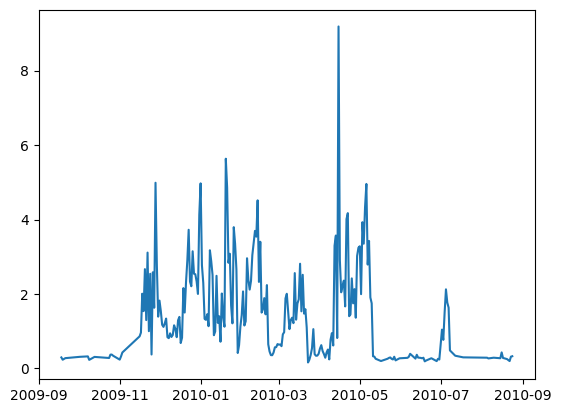

In [58]:
plt.plot(dt, sit)

# Create daily time series

.nc files with daily:
mean sit, std, min, max, time (readable format), location (change every year)

In [79]:
# put all this shit in a function

def read_txt(ifile):
    '''
    '''
   
    # Identify header (= to remove from data)
    with open(f'{ifile}','r') as f:
        lines = f.readlines()

    header_var = ['Date/Time\tLatitude\tLongitude\tSea ice draft [m]\n']
    # data start at this line
    idx_start = np.where(np.array([s in header_var for s in lines]))[0][0]+1

    # load data
    data = np.genfromtxt(f'{ifile}', delimiter='\t', dtype='U255', skip_header=idx_start, autostrip=True)
    types_data = ['U12', 'float', 'float', 'float']  # 4 cols

    # array with all the lines
    arr = []
    for dt in data:
        arr += [dt]

    nlines = data.shape[0]
    bb = np.array(arr).reshape(nlines, len(types_data))  # 28

    # create dictionary from the array
    dico = {}
    header_var = ['date', 'lat', 'lon','draft']
    
    for idx, (var, typecol) in enumerate(zip(header_var, types_data)):
        # format data
        if typecol == 'U12':
            typec = 'U12'
        elif typecol == 'float':
            typec = np.float64
        elif typecol == 'int':
            typec = np.int64

        dico[f'{var}'] = np.asarray(bb[:,idx], dtype=typec)
    return dico

    
def get_data(ifile):
    '''
    '''
    
    # read .txt
    dico = read_txt(ifile)

    # clean data
    chrono = np.array([datetime.datetime.strptime(date, '%Y-%m-%d') for date in dico['date']])
    sit = dico['draft']*1.2
    
    lat, lon = dico['lat'], dico['lon']
    
    return sit, lat, lon, chrono
    

## loop over all years

In [157]:
name_buoy = 'OuterShelf'
# 'Anabar'
# 'Khatanga'
# 'Lena'
# 'OuterShelf'

# globglob the file
idir = f'/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/'
ifiles = np.sort(glob(f'{idir}*{name_buoy}*.tab'))

In [158]:
ifiles

array(['/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/OuterShelf-08_sea-ice-draft.tab',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/OuterShelf-10_sea-ice-draft.tab',
       '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/OuterShelf-11_sea-ice-draft.tab'],
      dtype='<U113')

In [159]:
str_years = [ifile.split('-')[1][:2] for ifile in ifiles]
str_years = '_'.join(str_years)

In [160]:
fsit = []
# fsit_std = []
# fsit_min = []
# fsit_max = []
flat = []
flon = []
fdates = []
# valid_years = []

In [161]:
for ifile in ifiles:
    print(ifile)
    sit, lat, lon, dates = get_data(ifile)
    
    # add yearly data to full timeline
    if sit is not None:
        fsit.append(sit)
#         fsit_std.append(sit_std)
#         fsit_min.append(sit_min)
#         fsit_max.append(sit_max)
        flat.append(lat)
        flon.append(lon)
        fdates.append(dates)

/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/OuterShelf-08_sea-ice-draft.tab
/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/OuterShelf-10_sea-ice-draft.tab
/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/datasets/OuterShelf-11_sea-ice-draft.tab


In [162]:
fsit = np.concatenate(fsit, axis=0)
# fsit_std = np.concatenate(fsit_std, axis=0)
# fsit_min = np.concatenate(fsit_min, axis=0)
# fsit_max = np.concatenate(fsit_max, axis=0)
flat = np.concatenate(flat, axis=0)
flon = np.concatenate(flon, axis=0)

In [163]:
fdates = np.concatenate(fdates, axis=0)

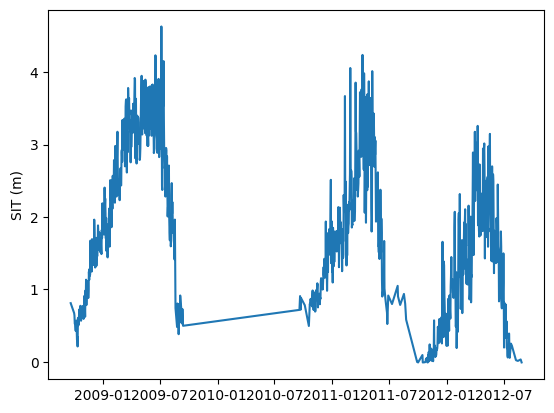

In [164]:
plt.plot(fdates, fsit)
plt.ylabel('SIT (m)');

In [165]:
print(f'Number of valid days: {fsit.shape[0]}')

Number of valid days: 883


## Running mean

In [166]:
from src.data_preparation import running_mean as rm

In [167]:
ndays = 7
smooth_data = rm.center_running_mean(fsit, ndays, npd=1)
sit_smooth = np.array(smooth_data)

/users/edelleo1/tardis/tardis-ml/src/data_preparation/running_mean.py:49: RuntimeWarning: Mean of empty slice
  window_average = np.nanmean(arr[-idx:-1])


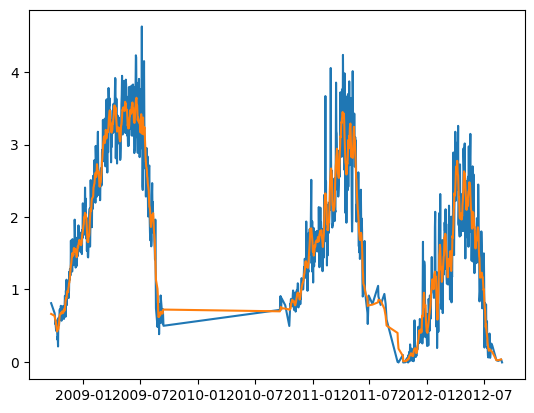

In [168]:
plt.plot(fdates, fsit)
plt.plot(fdates, sit_smooth)

## Save netcdf

In [169]:
odir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/netcdf/'

In [170]:
osit = xr.DataArray(fsit, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'sit',
                       'long_name':'mean sea ice thickness',
                       'unit':'m',
                      })

In [171]:
olat = xr.DataArray(flat, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'latitude',
                       'unit':'North'
                      })

In [172]:
olon = xr.DataArray(flon, 
                coords={'time': fdates}, 
                dims=["time"],
                attrs={'name':'longitude',
                       'unit':'East'
                      })

In [173]:
ods = xr.Dataset(data_vars={'sit':    osit,
                            'lat':olat,
                            'lon':olon
                           },
                   attrs=dict(
                       description='Timeseries of SIT from ADCP Transdrift',
                       mooring=f'ADCP Laptev Sea',
                       years=f'{str_years}',
                       author='Leo Edel, Nersc',
                       project='TARDIS',
                       date=f'{datetime.date.today()}')
                  )

In [174]:
ods

<xarray.Dataset>
Dimensions:  (time: 883)
Coordinates:
  * time     (time) datetime64[ns] 2008-09-20 2008-10-01 ... 2012-08-27
Data variables:
    sit      (time) float64 0.8102 0.6727 0.6393 ... 0.01289 0.03324 -0.007828
    lat      (time) float64 77.99 77.99 77.99 77.99 ... 76.8 76.8 76.8 76.8
    lon      (time) float64 143.0 143.0 143.0 143.0 ... 126.0 126.0 126.0 126.0
Attributes:
    description:  Timeseries of SIT from ADCP Transdrift
    mooring:      ADCP Laptev Sea
    years:        08_10_11
    author:       Leo Edel, Nersc
    project:      TARDIS
    date:         2023-09-11

In [175]:
filename = f'adcp_Transdrift_{name_buoy}_{str_years}.nc'

In [176]:
ofile = save_name.check(f"{odir}", filename)
ods.to_netcdf(f'{odir}{ofile}')
print(f'Netcdf saved as: {odir}{ofile}')

Netcdf saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ADCP_Transdrift/netcdf/adcp_Transdrift_OuterShelf_08_10_11.nc


# Plot time series

In [114]:
import matplotlib.pyplot as plt

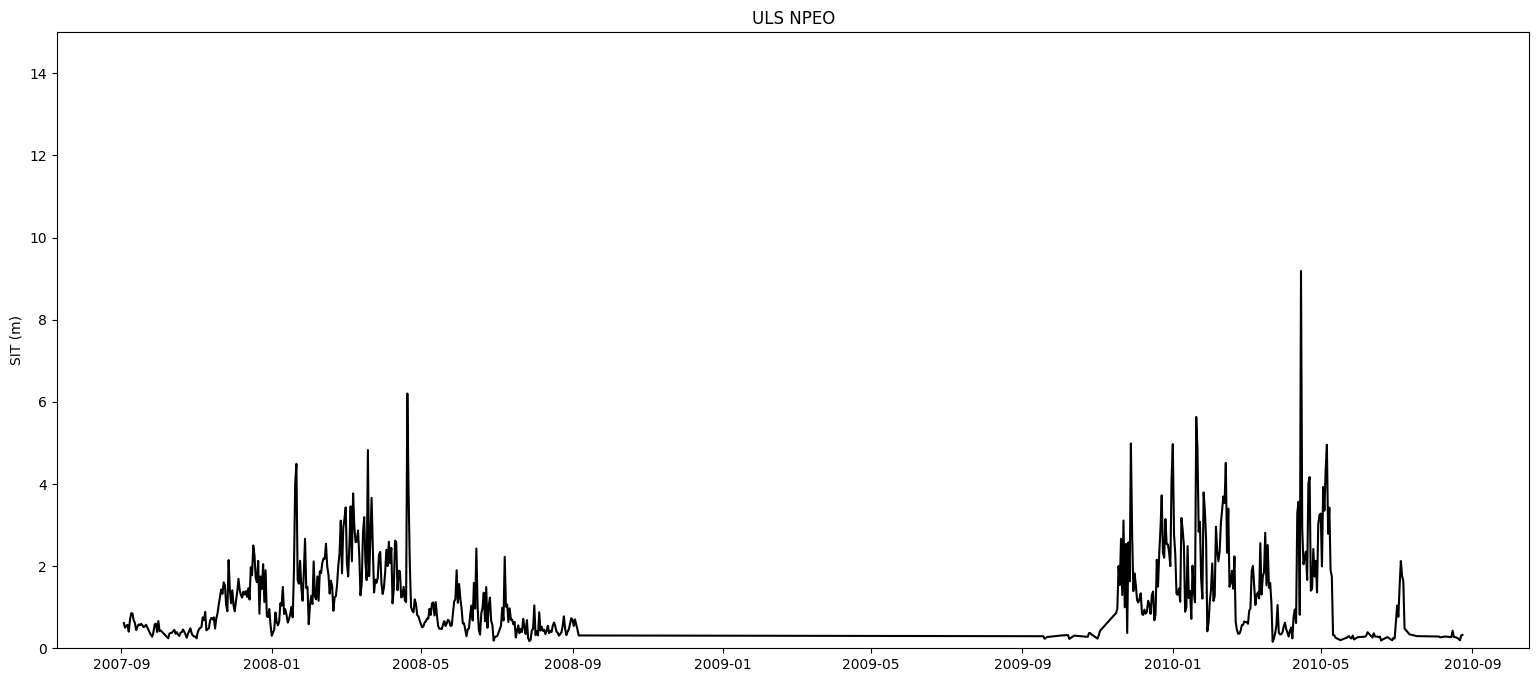

In [115]:
plt.figure(figsize=(19,8))

plt.plot(fdates, fsit, 'k', ls='-')
# plt.plot(fdates, fsit+fsit_std, c='grey', alpha=0.7)
# plt.plot(fdates, fsit-fsit_std, c='grey', alpha=0.7)

plt.ylim([0,15])
plt.ylabel('SIT (m)');
plt.title(f'ULS NPEO');